## Pyber Matplotlib Challange

In [184]:
# Import needy files 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [185]:
!ls raw_data

city_data.csv
ride_data.csv


In [186]:
# Read cvs files

city_df = pd.read_csv('./raw_data/city_data.csv')
ride_df = pd.read_csv('./raw_data/ride_data.csv')

In [187]:
# merge the files 

data = pd.merge(city_df, ride_df, on = 'city', how = 'left' )
data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [188]:
# select Urban cities

urban_df = data.loc[data["type"] == "Urban"]

In [189]:
urban_city_df = urban_df.groupby(['city', 'type'])
urban_avg_fare = round(urban_city_df['fare'].mean(),2)
urban_total_city_name = urban_city_df['ride_id'].count()
urban_total_driver_count = urban_city_df['driver_count'].sum()

In [190]:
urban_data = pd.DataFrame({'Average Fare': urban_avg_fare, "Number of Rides": urban_total_city_name, "Total Driver Count" : urban_total_driver_count})
urban_data['Number of Drivers '] = urban_data['Total Driver Count']/urban_data['Number of Rides']


In [191]:
# Select sub cities

sub_df = data.loc[data["type"] == "Suburban"]

In [192]:
sub_city_df = sub_df.groupby(['city', 'type'])
sub_avg_fare = round(sub_city_df['fare'].mean(),2)
sub_total_city_name = sub_city_df['ride_id'].count()
sub_total_driver_count = sub_city_df['driver_count'].sum()

In [193]:
sub_data = pd.DataFrame({'Average Fare': sub_avg_fare, "Number of Rides": sub_total_city_name, "Total Driver Count" : sub_total_driver_count})
sub_data['Number of Drivers '] = sub_data['Total Driver Count']/sub_data['Number of Rides']

In [194]:
# Select rutal cities

rural_df = data.loc[data["type"] == "Rural"]

In [195]:
rural_city_df = rural_df.groupby(['city', 'type'])
rural_avg_fare = round(rural_city_df['fare'].mean(),2)
rural_total_city_name = rural_city_df['ride_id'].count()
rural_total_driver_count = rural_city_df['driver_count'].sum()

In [196]:
rural_data = pd.DataFrame({'Average Fare': rural_avg_fare, "Number of Rides": rural_total_city_name, "Total Driver Count" : rural_total_driver_count})
rural_data['Number of Drivers '] = rural_data['Total Driver Count']/rural_data['Number of Rides']

In [197]:
frames = [urban_data, sub_data, rural_data]
result = pd.concat(frames)

In [198]:
result = result.drop('Total Driver Count', axis=1)
result.head()

,,Average Fare,Number of Rides,Number of Drivers
city,type,,,
Alvarezhaven,Urban,23.93,31,21.0
Alyssaberg,Urban,20.61,26,67.0
Antoniomouth,Urban,23.62,22,21.0
Aprilchester,Urban,21.98,19,49.0
Arnoldview,Urban,25.11,31,41.0


In [199]:
result['type'] = [y for x,y in result.index]
result.head()

,,Average Fare,Number of Rides,Number of Drivers,type
city,type,,,,
Alvarezhaven,Urban,23.93,31,21.0,Urban
Alyssaberg,Urban,20.61,26,67.0,Urban
Antoniomouth,Urban,23.62,22,21.0,Urban
Aprilchester,Urban,21.98,19,49.0,Urban
Arnoldview,Urban,25.11,31,41.0,Urban


## Bubble Plot of Ride Sharing Data

In [200]:
drivers_num = result.iloc[:,2]

In [201]:
# plot Ride Sharing data 

city_types = ['Urban', 'Suburban','Rural']
color = ["Blue", "Gold", "Green"]

for city in city_types:
    plt.scatter(result.loc[result['type'] == city]['Number of Rides'], result.loc[result['type'] == city]['Average Fare'], linewidth = 1, edgecolors = "black", alpha = 0.50, s = 4*drivers_num )
plt.legend(city_types)

In [202]:
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fares ($)')
plt.grid(True)

In [203]:
plt.savefig('PyberRideSharigData.png')

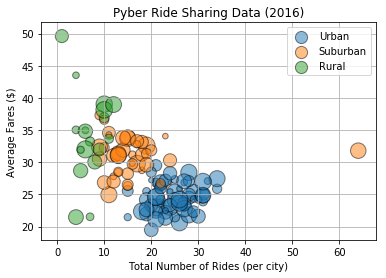

In [204]:
plt.show()

## Collect data for Percentage of Average Fare, Number of Rides and Number of Drivers per city type

In [205]:
sum_it_up = result.groupby('type')
sum_it_up = pd.DataFrame(sum_it_up.sum())

C:\Users\mrbal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'type' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [206]:
avg_sum = sum_it_up['Average Fare'].sum()
rides_sum = sum_it_up['Number of Rides'].sum()
drivers = sum_it_up.iloc[:,2]
drivers_num = drivers.sum()

In [207]:
sum_it_up['Percent Average Fare'] = round((sum_it_up['Average Fare']/avg_sum)*100,2)
sum_it_up['Percent Number of Rides'] = round((sum_it_up['Number of Rides']/rides_sum)*100,2)
drivers = sum_it_up.iloc[:,2]
sum_it_up['Percent Number of Drivers'] = round((drivers/drivers_num)*100,2)
sum_it_up

,Average Fare,Number of Rides,Number of Drivers,Percent Average Fare,Percent Number of Rides,Percent Number of Drivers
type,,,,,,
Rural,615.72,125,104.0,17.55,5.19,3.11
Suburban,1268.64,657,629.0,36.16,27.30,18.83
Urban,1623.89,1625,2607.0,46.29,67.51,78.05


## Total Fares by City Type

In [208]:
labels = 'Rural', 'Suburban', 'Urban'
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sum_it_up['Percent Average Fare'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=130)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Fares by City Type')

In [209]:
plt.savefig('TotalFaresByCityType.png')

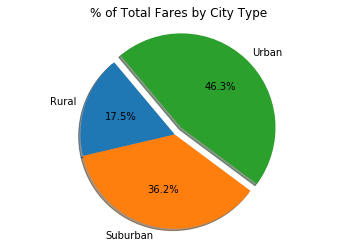

In [210]:
plt.show()

## Total Rides by City Type

In [211]:
labels = 'Rural', 'Suburban', 'Urban'
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sum_it_up['Percent Number of Rides'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=130)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Rides by City Type')

In [212]:
plt.savefig('TotalRidesByCityType.png')

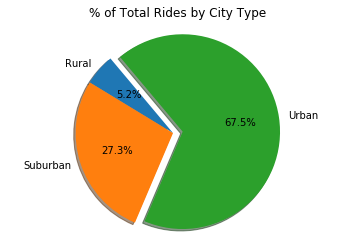

In [213]:
plt.show()

## Total Drivers by City Type

In [214]:
labels = 'Rural', 'Suburban', 'Urban'
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sum_it_up['Percent Number of Drivers'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=130)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Drivers by City Type')


In [215]:
plt.savefig('TotalDriversByCityType.png')

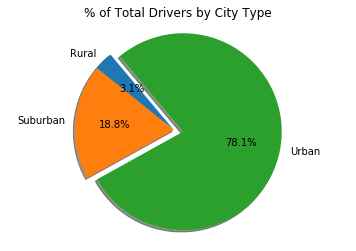

In [216]:
plt.show()